In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np

In [25]:
#Load Datasets

## load Project Sunroof Data
sr_data = pd.read_csv("data/project-sunroof-census_tract.csv", index_col="region_name")
sr_data = sr_data.rename_axis(index={"region_name": "GEOID"})
sr_data.index = sr_data.index.astype(int)
#print(sr_data.head(5))

#load Energy Equity Project Data
eep_data = pd.read_csv("data/eep_final_data.csv", index_col="GEOID")
eep_data.index = eep_data.index.astype(int)
#print(eep_data.head(5))

#load Justice40 Data
j40_data = pd.read_csv("data/1.0-communities.csv", index_col="Census tract 2010 ID")
j40_data = j40_data.rename(columns={"Census tract 2010 ID": "GEOID"})
j40_data.index = j40_data.index.astype(int)
#print(j40_data.head(5))

#load Opportunity Zone Data
oz_data = pd.read_csv("data/Opportunity_Zone_ExportTable1.csv", index_col="Tract_Boundaries_ID")
oz_data = oz_data.rename(columns={"Tract_Boundaries_ID": "GEOID"})
oz_data.index = oz_data.index.astype(int)
#print(oz_data.head(5))

#load REPLICA data
replica_data = pd.read_csv("data/seeds_ii_replica.csv", index_col="geoid")
replica_data = replica_data.rename(columns={"geoid": "GEOID"})
replica_data.index = replica_data.index.astype(int)
#print(oz_data.head(5))

/var/folders/67/r87g720s2653g554zdhtz1vh0000gn/T/ipykernel_44423/4210256436.py:15: DtypeWarning: Columns (18,26,70,72,85,131) have mixed types. Specify dtype option on import or set low_memory=False.
  j40_data = pd.read_csv("data/1.0-communities.csv", index_col="Census tract 2010 ID")
/var/folders/67/r87g720s2653g554zdhtz1vh0000gn/T/ipykernel_44423/4210256436.py:27: DtypeWarning: Columns (148) have mixed types. Specify dtype option on import or set low_memory=False.
  replica_data = pd.read_csv("data/seeds_ii_replica.csv", index_col="geoid")


In [6]:
#Load Geospatial Dataset

#load urban areas dataset from US Census Bureau
urban_census_geodata = gpd.read_file("data/tl_2010_us_uac10.shx")

#load Energy Equity Project geojson for geometry
eep_geodata = gpd.read_file("data/eep_final_simplified.json")

In [21]:
#Join spatial sets to get urban tracts
urban_geodata = eep_geodata.overlay(urban_census_geodata, how='intersection')

#Get list of urban tracts
urban_tracts = urban_geodata[["GEOID"]]

/usr/local/lib/python3.10/site-packages/geopandas/geodataframe.py:2452: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  return geopandas.overlay(
/usr/local/lib/python3.10/site-packages/geopandas/geodataframe.py:1803: FutureWarning: `unary_union` returned None due to all-None GeoSeries. In future, `unary_union` will return 'GEOMETRYCOLLECTION EMPTY' instead.
  merged_geom = block.unary_union
/usr/local/lib/python3.10/site-packages/geopandas/geodataframe.py:2452: UserWarning: `keep_geom_type=True` in overlay resulted in 53184 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  return geopandas.overlay(


In [28]:
#Extract GEOID and Geometry to join into other datasets later
tract_geoid = eep_geodata[["GEOID", "geometry"]]
tract_geoid = tract_geoid.set_index("GEOID")
tract_geoid.index = tract_geoid.index.astype(int)

Text(0.5, 1.0, 'Google Project Sunroof Data Coverage')

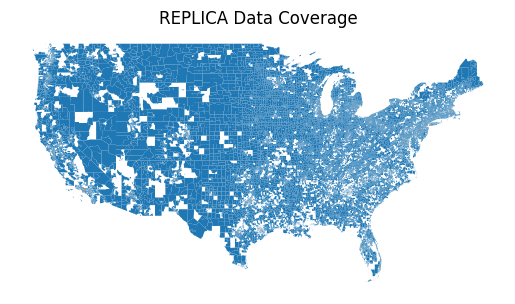

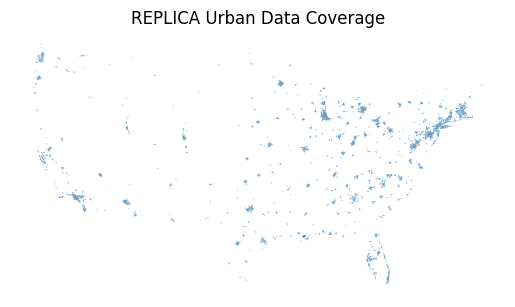

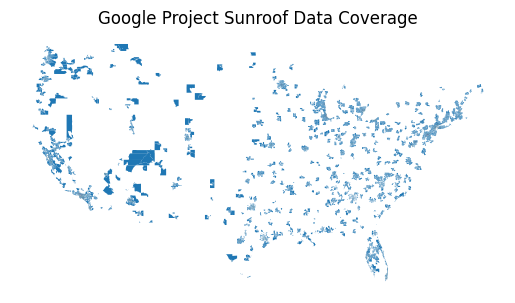

In [32]:
#Merge datasets with geometries
replica_geodata = tract_geoid.merge(replica_data, left_index=True, right_index=True)
sr_geodata = tract_geoid.merge(sr_data, left_index=True, right_index=True)

#Map REPLICA data vs Sunroof Data
replica_map = replica_geodata.plot()
urban_locales = ["City - Large", "City - Midsize", "City - Small", "Suburban - Large", "Suburban - Midsize", "Suburban - Small"]
replica_urb_map = replica_geodata[replica_geodata["locale"].isin(urban_locales)].plot()
sr_map = sr_geodata.plot()

replica_map.set_axis_off()
replica_map.set_title("REPLICA Data Coverage")

replica_urb_map.set_axis_off()
replica_urb_map.set_title("REPLICA Urban Data Coverage")

sr_map.set_axis_off()
sr_map.set_title("Google Project Sunroof Data Coverage")


In [24]:
print(urban_census_geodata.shape)
print(eep_geodata.shape)
print(urban_geodata.shape)

(3592, 1)
(83548, 45)
(77141, 45)


In [12]:
#Check datasets for shape
print(sr_data.shape)
print(eep_data.shape)
print(j40_data.shape)
# print(sr_geodata.shape) #Missing about 10,000 wHY??
# print(eep_geodata.shape)

(56940, 30)
(83548, 43)
(74134, 132)


In [14]:
#Combine data
sr_selected_cols = sr_data[['percent_covered', 'number_of_panels_total', 'number_of_panels_median', 'kw_median', 'kw_total', 
                            'yearly_sunlight_kwh_median', 'yearly_sunlight_kwh_total', 'carbon_offset_metric_tons', 'existing_installs_count']]

eep_selected_cols = eep_data[['STATE_NAME', 'energy_burden', 'num_solar_installers', 'median_income_solar', 'total_pop', 'year_built', 
                              'total_households', 'median_income', 'owner_occupied', 'renter_occupied', 'bipoc_percent', 'community_power_score',  ]]

j40_selected_cols = j40_data[['Total population', 'Is low income?']]

merged_data = pd.merge(sr_selected_cols, eep_selected_cols, left_index=True, right_index=True)
merged_data = pd.merge(merged_data, j40_selected_cols, left_index=True, right_index=True )

print(merged_data.head(5))

            percent_covered  number_of_panels_total  number_of_panels_median   
1001020100       103.360215                 39080.0                     48.0  \
1001020200       104.472843                 59054.0                     44.0   
1001020300       101.278409                 80364.0                     41.0   
1001020400       101.384451                 94598.0                     54.0   
1001020600       113.555195                 93919.0                     48.0   

            kw_median  kw_total  yearly_sunlight_kwh_median   
1001020100      12.00   9770.00                 14854.40286  \
1001020200      11.00  14763.50                 13564.14519   
1001020300      10.25  20091.00                 12725.93064   
1001020400      13.50  23649.50                 16586.32144   
1001020600      12.00  23479.75                 15360.34045   

            yearly_sunlight_kwh_total  carbon_offset_metric_tons   
1001020100                 12300000.0                7325.568357  \
1001

In [22]:
#Filter for urban tracts
urban_geoids = urban_tracts.index.unique()
filtered_data = merged_data.loc[merged_data.index.isin(urban_tracts)]
print(urban_tracts.shape)
print(urban_geoids.shape)
print(merged_data.shape)
print(filtered_data.shape)

(77141, 1)
(77141,)
(47295, 23)
(0, 23)


<Axes: >

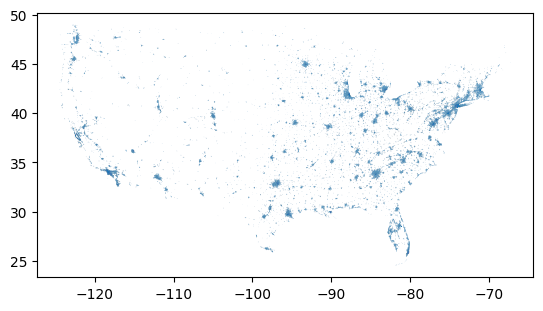

In [23]:
urban_geodata.plot()

In [11]:
#Clean Data
cleaned_data = merged_data.copy()

#TODO
#EEP energy_burden has 100% values for some tracts
#SR has negative values

TypeError: '<' not supported between instances of 'str' and 'int'